In [2]:
import numpy as np # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
from tabulate import tabulate

# bibliotecas usadas para geracao de graficos
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap

# bibliotecas para realização de funções relacionadas KNN
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, mean_absolute_error, confusion_matrix
from sklearn import datasets
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler


print('Bibliotecas carregadas com sucesso')

Bibliotecas carregadas com sucesso


In [3]:
# importa o arquivo e guarda em um dataframe do Pandas
data = pd.read_csv( 'heart.csv', encoding='iso-8859_1', delimiter=',', index_col=None)

print('Dados importados com sucesso!')
print(data.shape)

Dados importados com sucesso!
(1025, 14)


In [4]:
# exibe o dataframe

display(data.head(n=10))

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
5   0     2       1  
6   3     1       0  
7   1     3       0  
8   0     3       0  
9   2     2       0

In [5]:
data.info()
#display(heart_disease_df.head(n=30))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
def delDuplicatas( df_dataset ):
    '''
    Para cada grupo de amostras duplicadas, mantém uma e apaga as demais
    '''

    # remove as amostras duplicadas, mantendo apenas a primeira ocorrencia
    df_dataset = df_dataset.drop_duplicates(keep = 'first')

    return df_dataset

data = delDuplicatas( data )

In [7]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [8]:
def normalizar(X):


    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1) #ddof = delta degrees of freedom

    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


# Normalizar algumas colunas
#columns_to_normalize = ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca','thal']
columns_to_normalize = ['age', 'trestbps', 'chol', 'thalach']
X = data[columns_to_normalize].values
# Chama a função para normalizar
X_norm, mu, sigma = normalizar(X)

data[columns_to_normalize] = X_norm

#Exibe a normalização de algumas colunas
data.describe().round(8)

age         sex          cp    trestbps        chol         fbs  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    -0.000000    0.682119    0.963576   -0.000000   -0.000000    0.149007   
std      1.000000    0.466426    1.032044    1.000000    1.000000    0.356686   
min     -2.809529    0.000000    0.000000   -2.140967   -2.328345    0.000000   
25%     -0.709610    0.000000    0.000000   -0.660615   -0.685944    0.000000   
50%      0.119305    1.000000    1.000000   -0.091249   -0.115934    0.000000   
75%      0.727176    1.000000    2.000000    0.478117    0.545857    0.000000   
max      2.495529    1.000000    3.000000    3.894313    6.134852    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490   -0.000000    0.327815    1.043046    1.397351    0.718543   
std      0.526027    1.000000    0.470196    1.161452    0.616274    1.006748   
min      0.000000   -3.430456    0.000000    0.000000    0.000000    0.000000   
25%      0.000000   -0.712534    0.000000    0.000000    1.000000    0.000000   
50%      1.000000    0.127948    0.000000    0.800000    1.000000    0.000000   
75%      1.000000    0.717377    1.000000    1.600000    2.000000    1.000000   
max      2.000000    2.289187    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

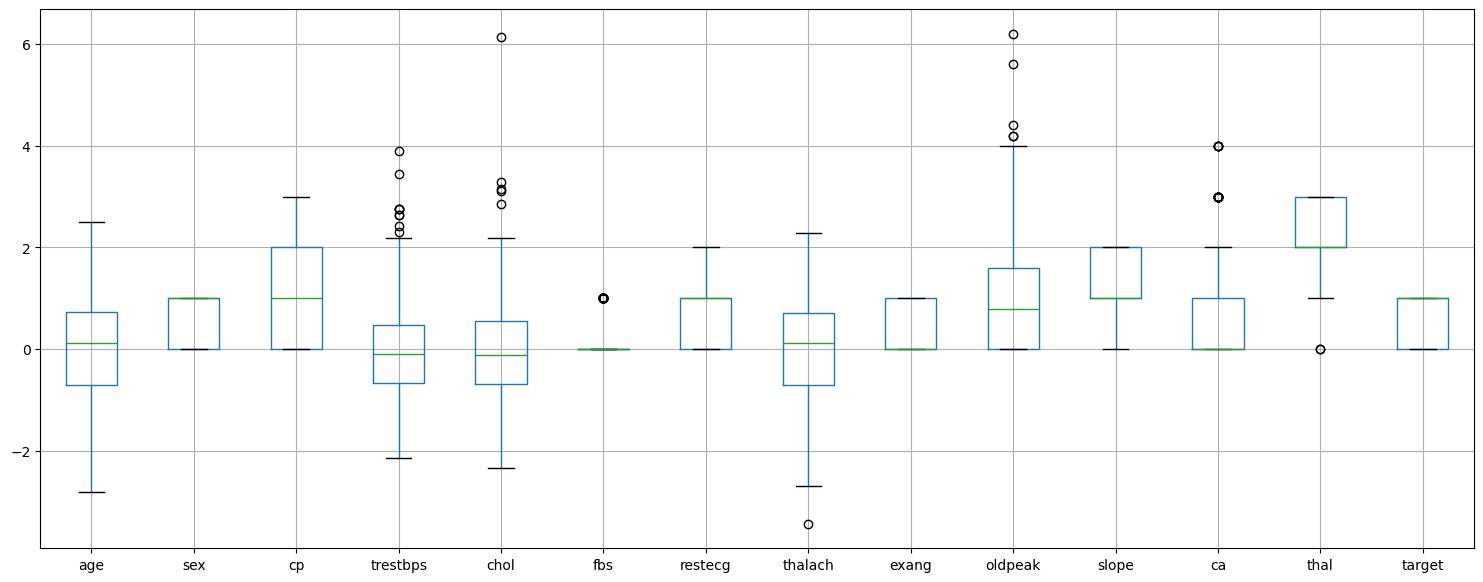

In [9]:
data.boxplot(figsize=(18.5,7))
plt.show()

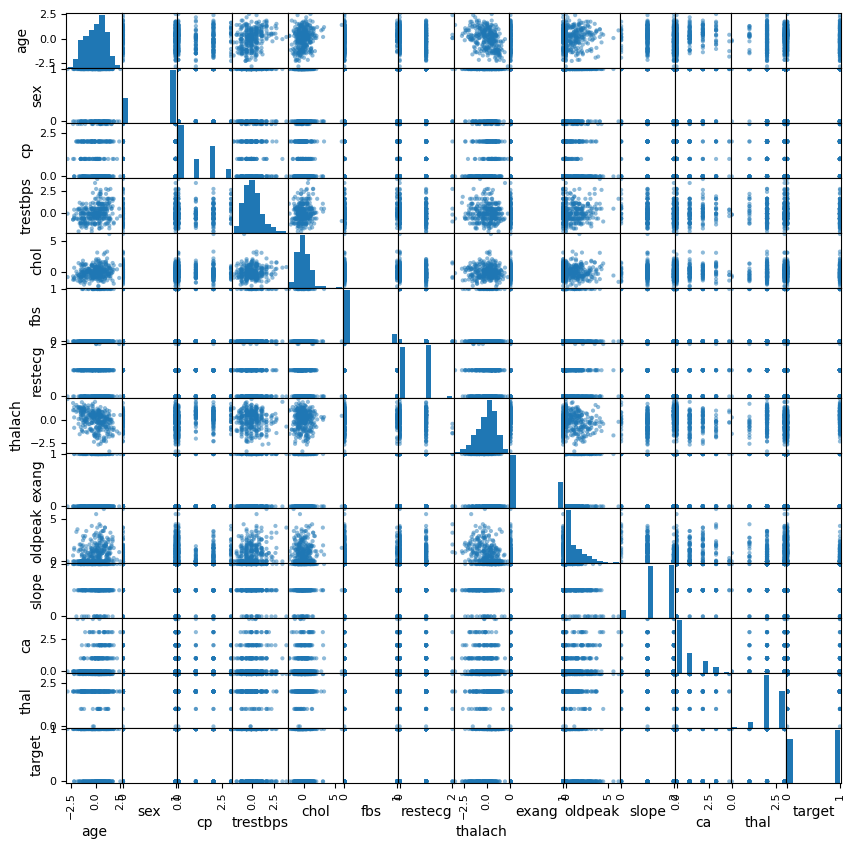

In [12]:
pd.plotting.scatter_matrix(data, figsize=(10,10))

plt.show()

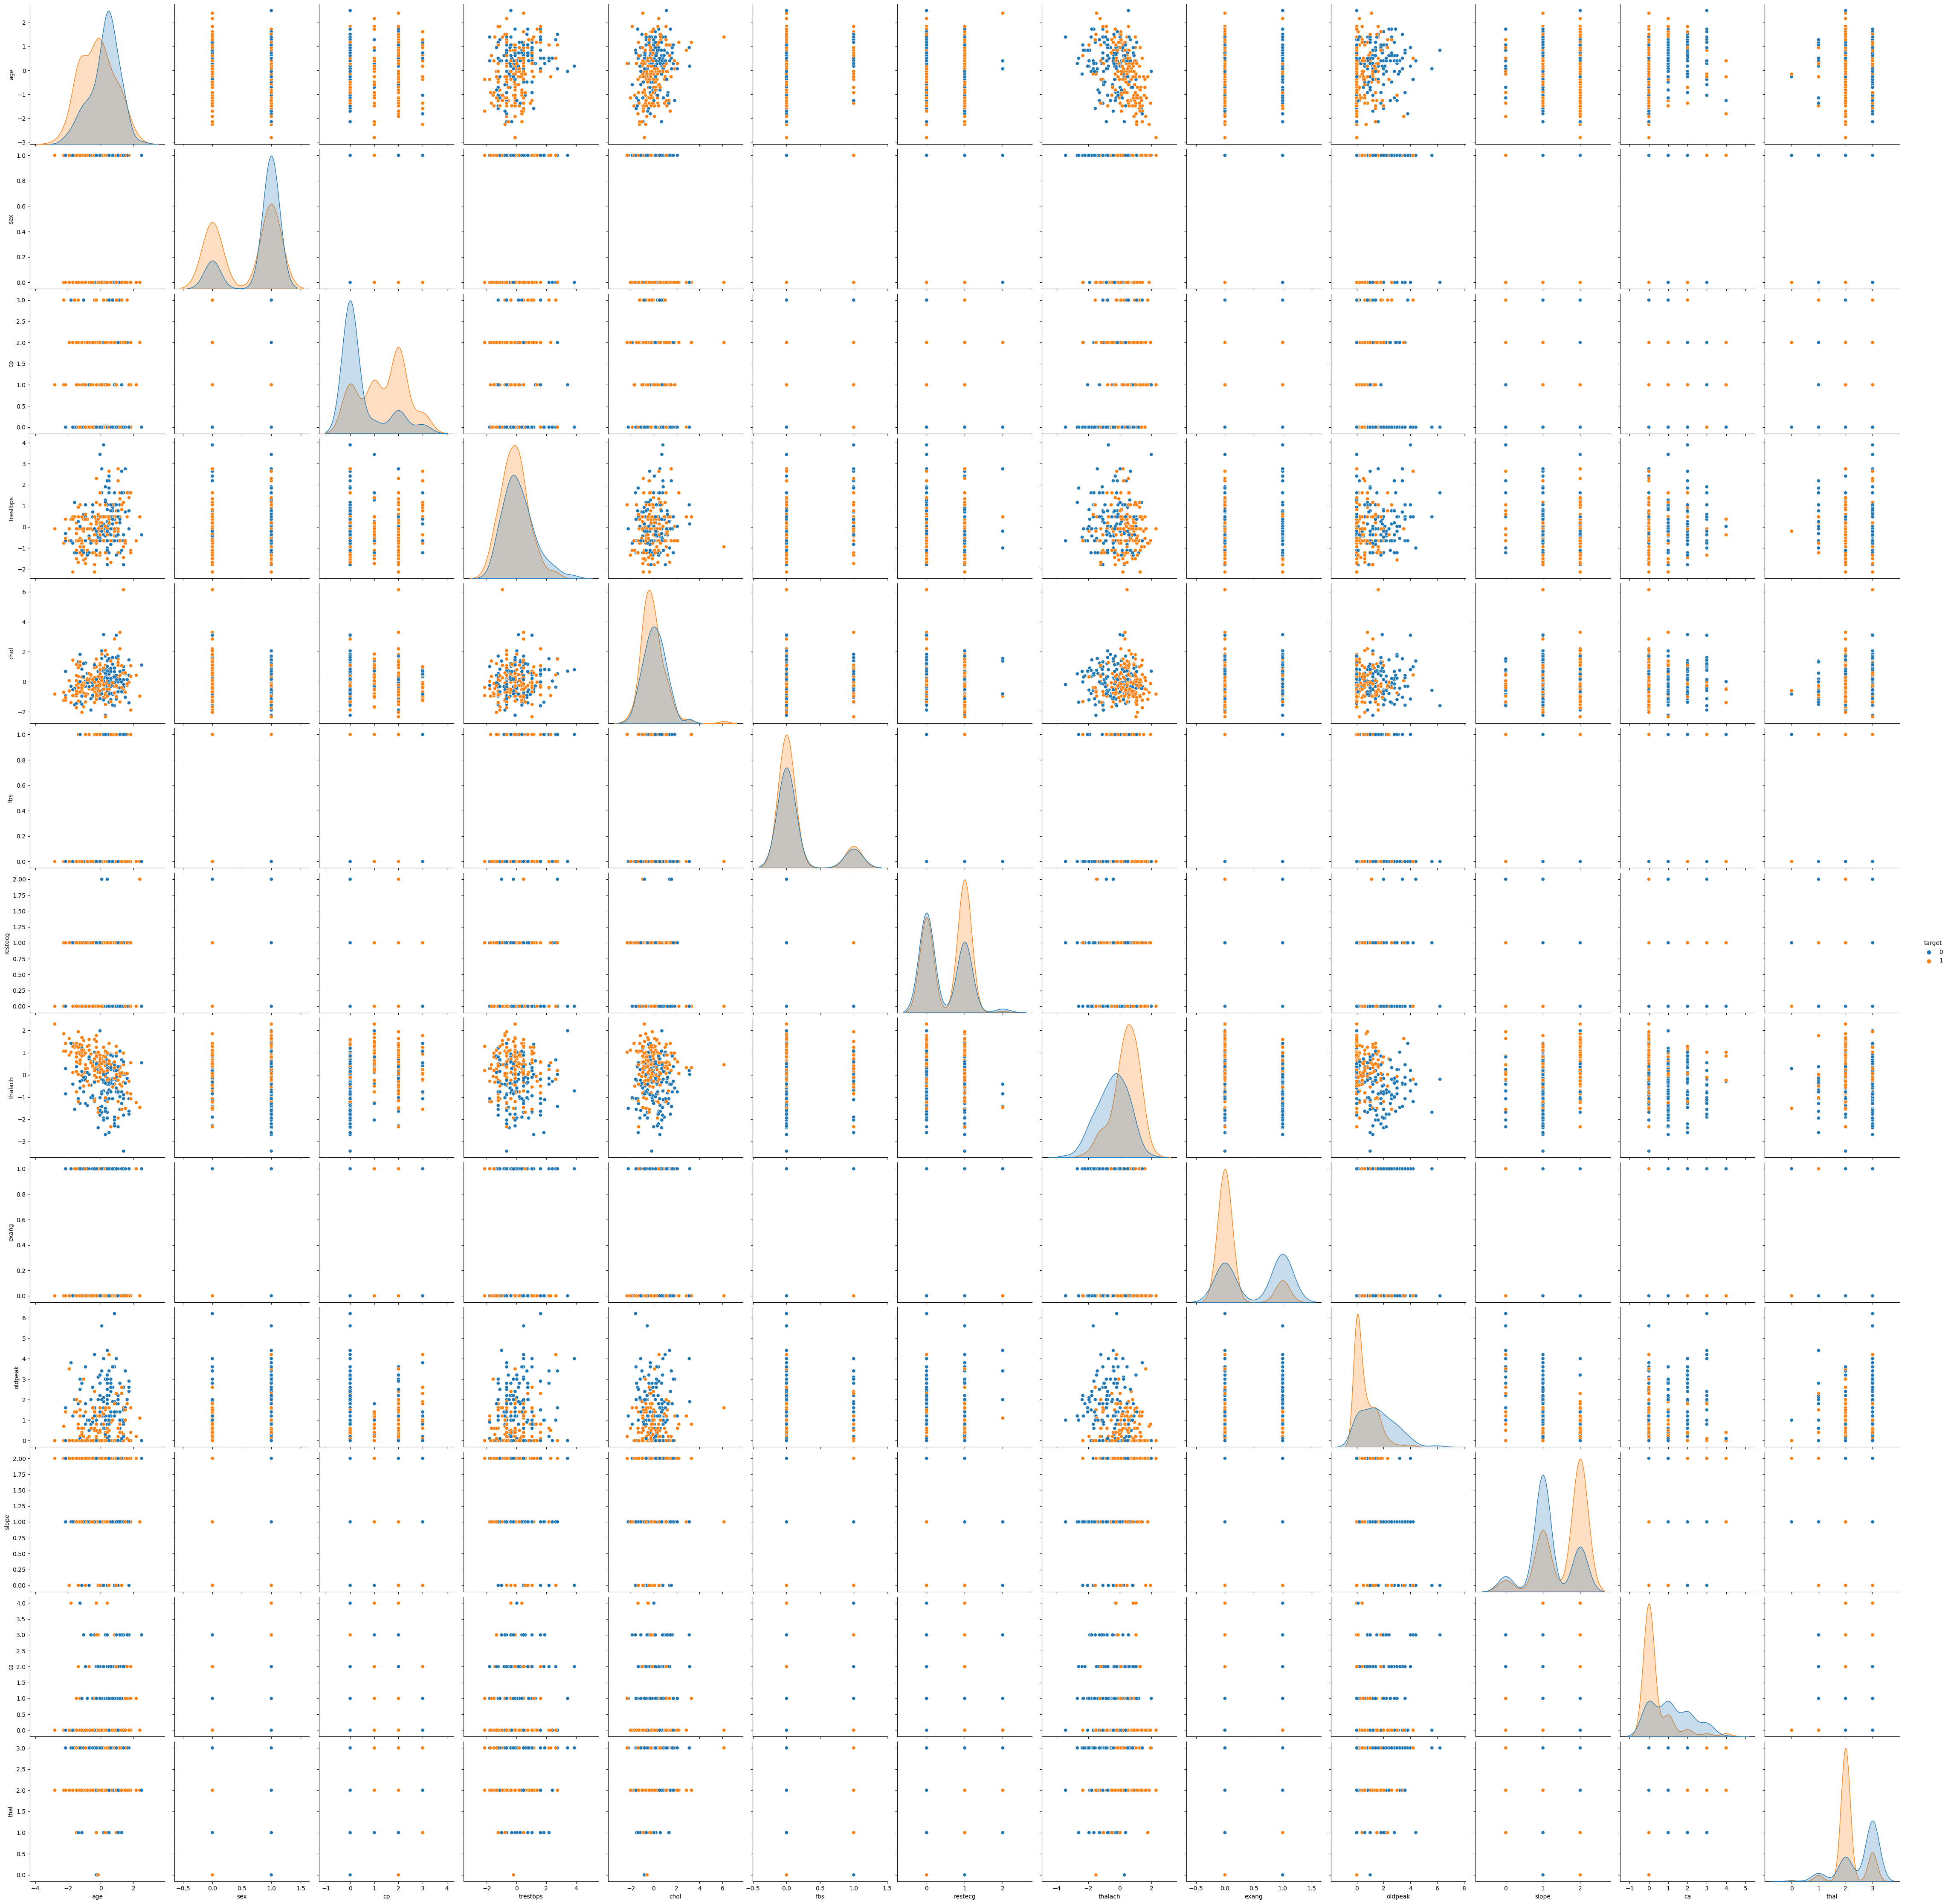

In [13]:
sns.pairplot(data, hue='target', height=3.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

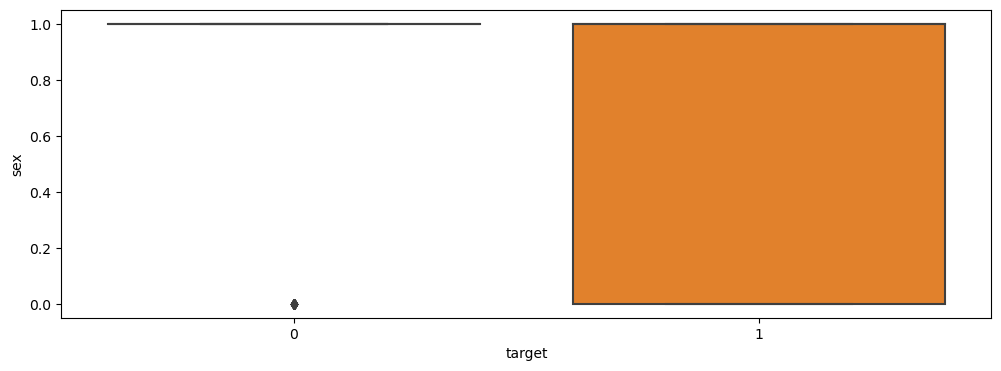

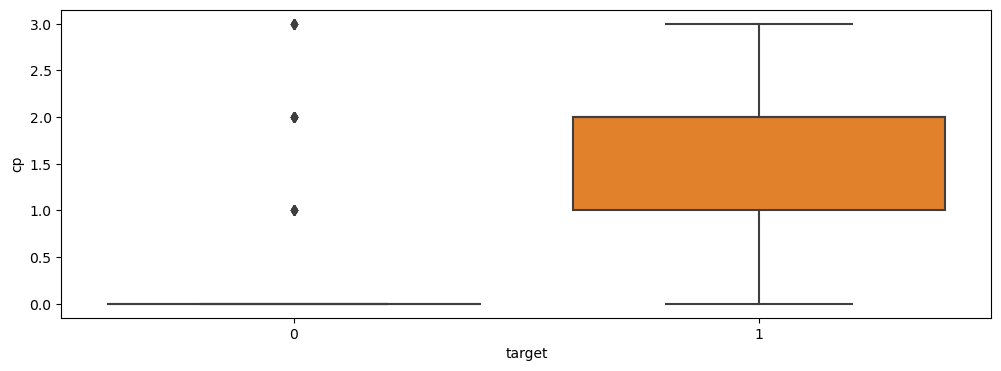

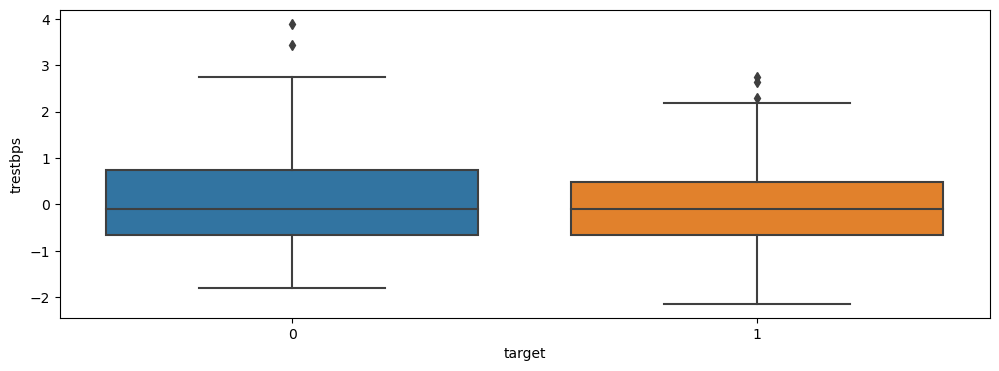

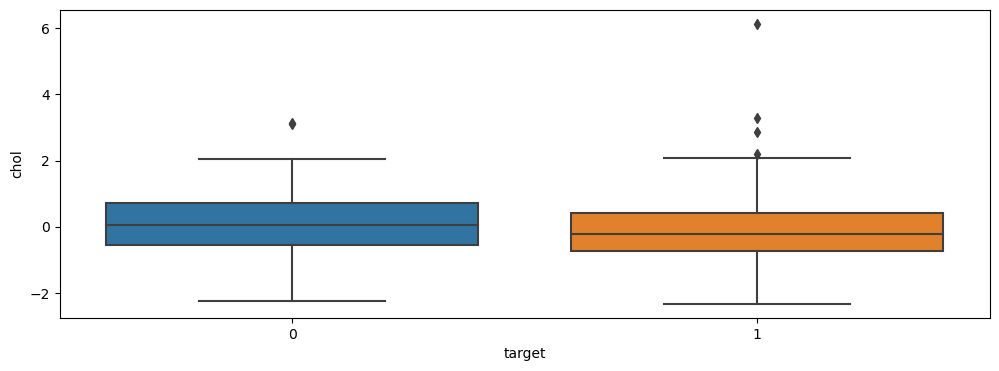

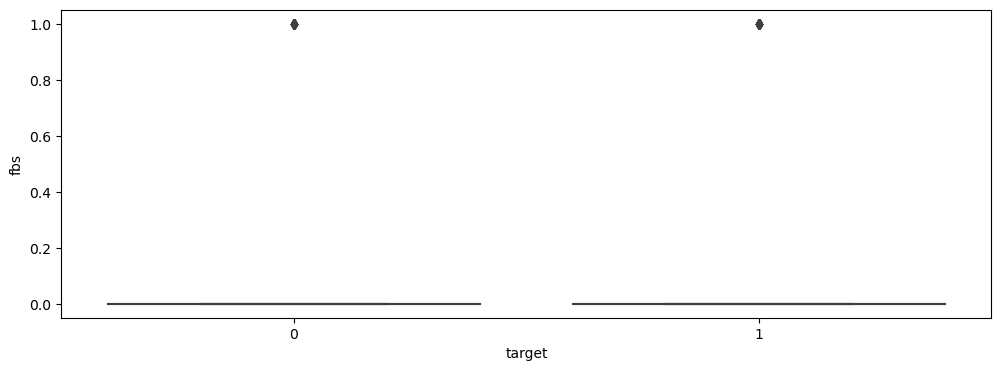

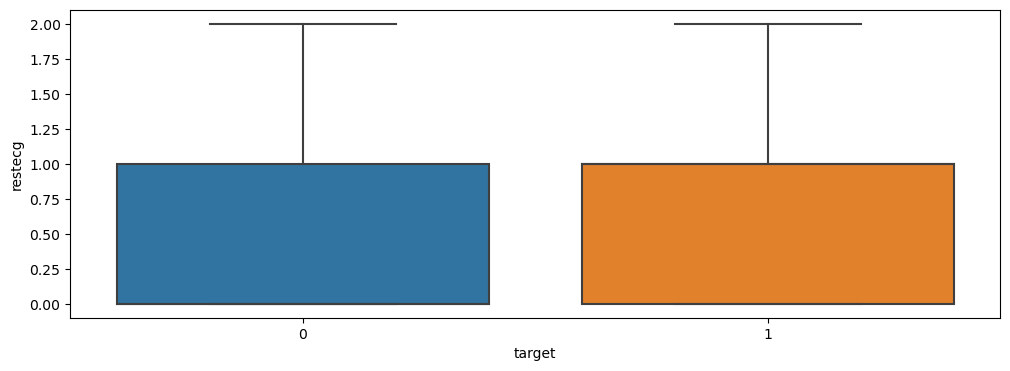

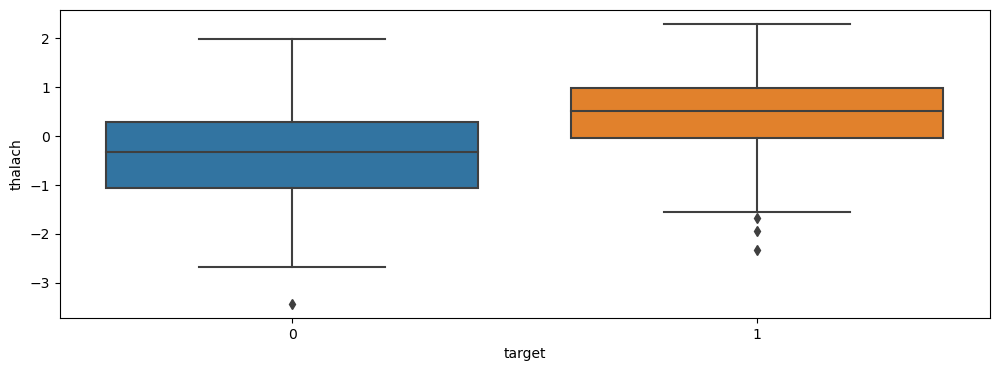

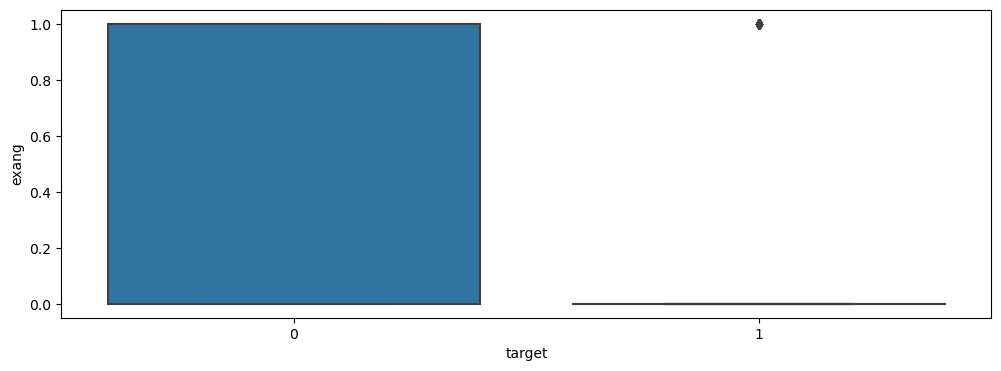

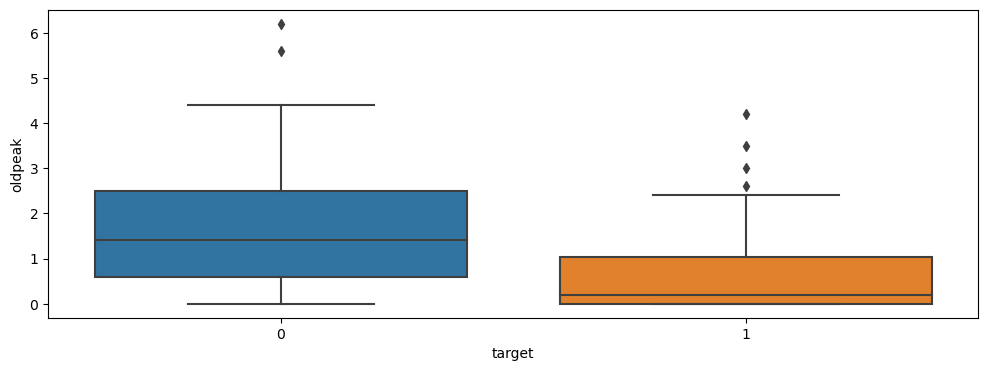

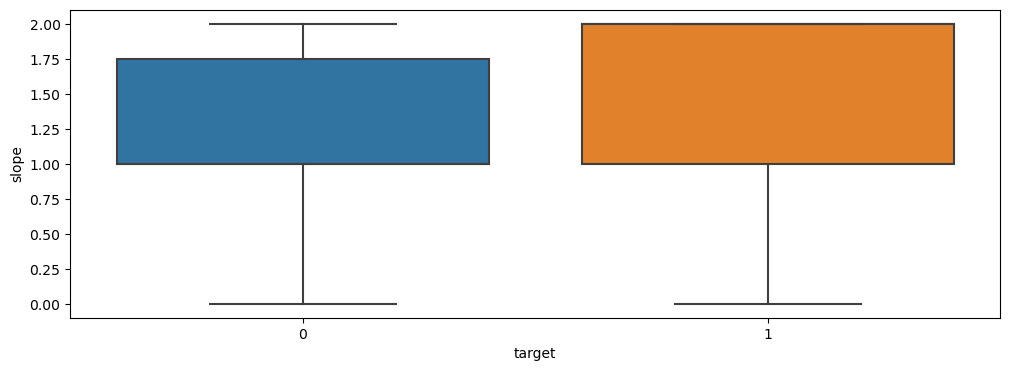

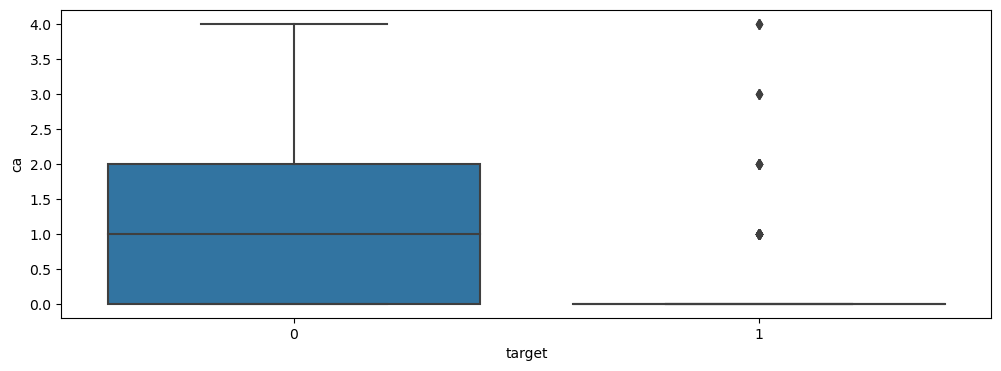

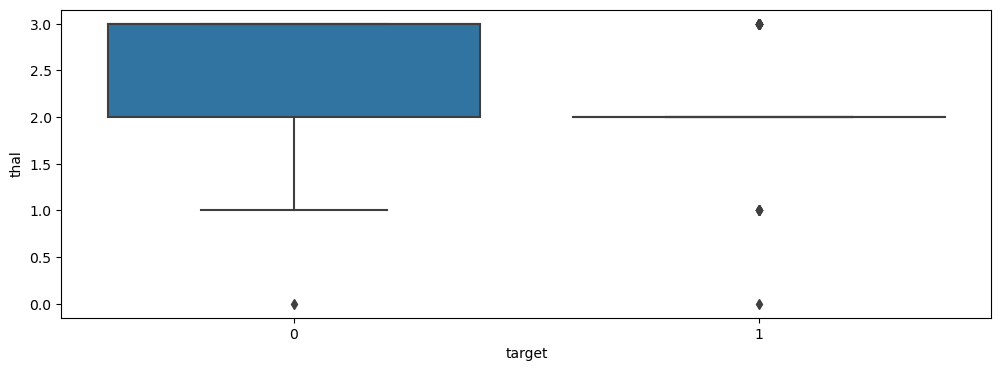

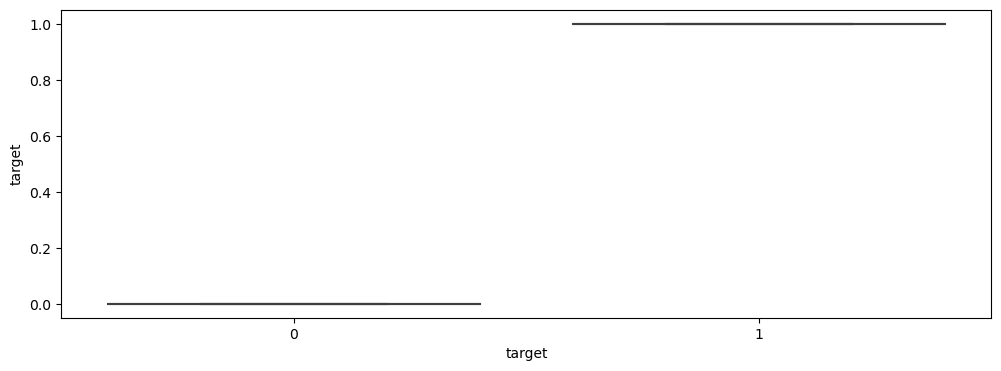

In [14]:
for atributo in data.columns[1:]:
    # define a dimensão do gráfico
    plt.figure(figsize=(12,4))

    # cria o boxplot
    sns.boxplot(x="target", y=atributo, data=data, whis=1.5)

    # mostra o gráfico
    plt.show()

1    164
0    138
Name: target, dtype: int64

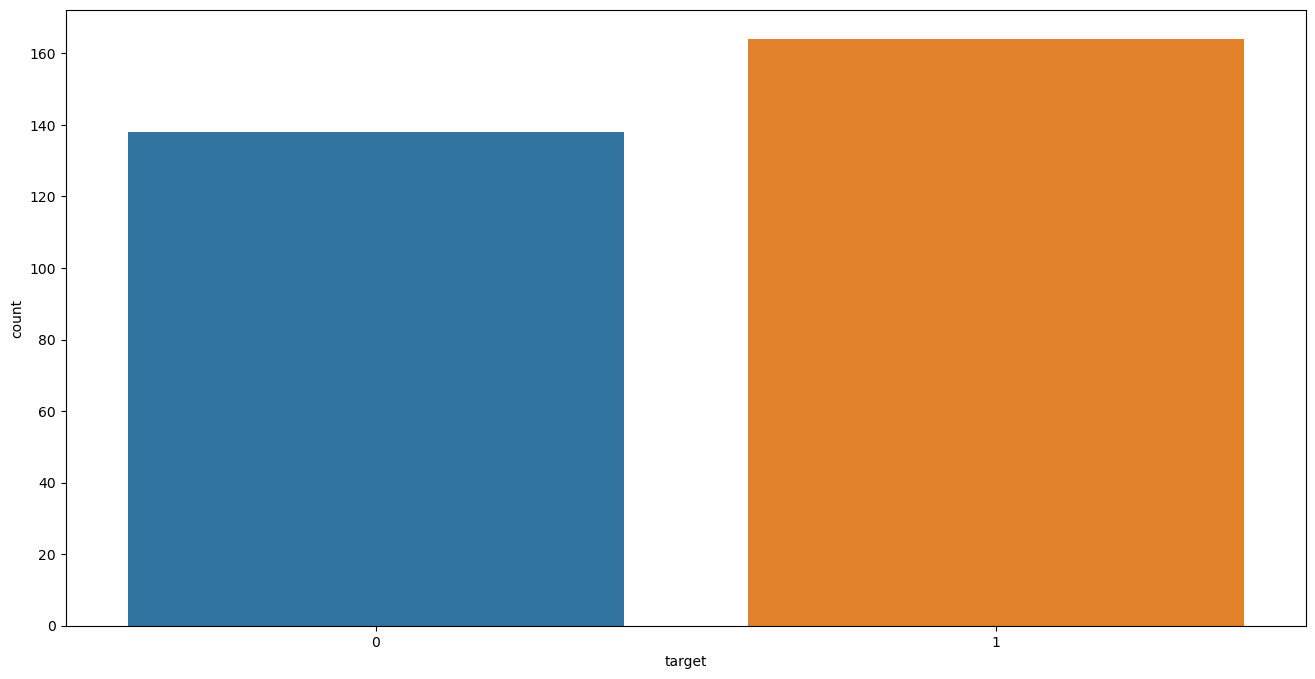

In [15]:
display( data['target'].value_counts() )

# define a dimensão do gráfico
plt.figure(figsize=(16,8))

# cria um gráfico de barras com a frequência de cada player_positions
sns.countplot(x="target", data=data)

# mostra o gráfico
plt.show()

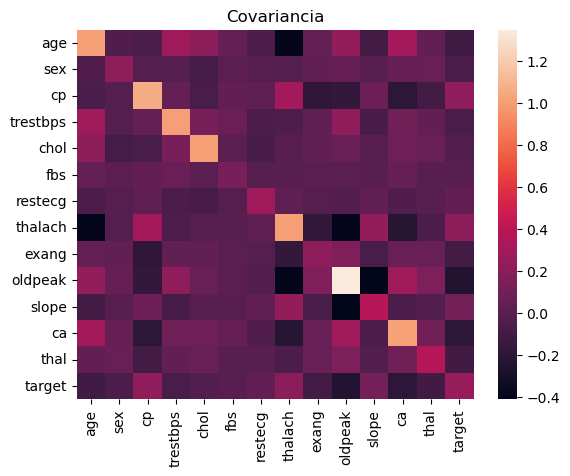

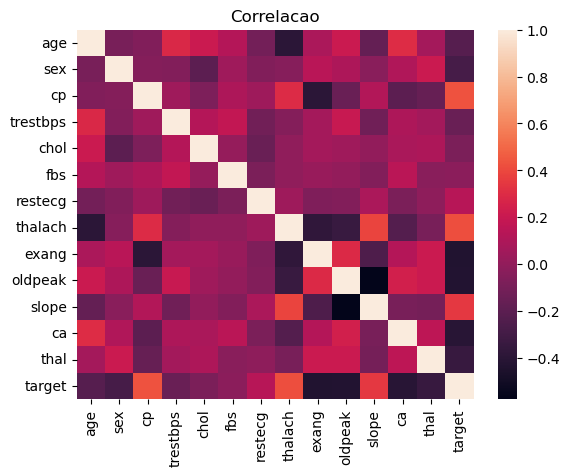

In [16]:
# criando uma matriz X com os valores do data frame
X = data.iloc[:,:-1].values

# matriz de covariancia
covariance = np.cov(X, rowvar=False)

# matriz de correlação
correlation = np.corrcoef(X, rowvar=False)

# matriz de covariancia
df_covariance = data.cov()

# matriz de correlação
df_correlation = data.corr()

# cria um mapa de cores dos valores da covariancia
sns.heatmap(df_covariance,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Covariancia')
plt.show()

# cria um mapa de cores dos valores da correlação
sns.heatmap(df_correlation,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlacao')
plt.show()

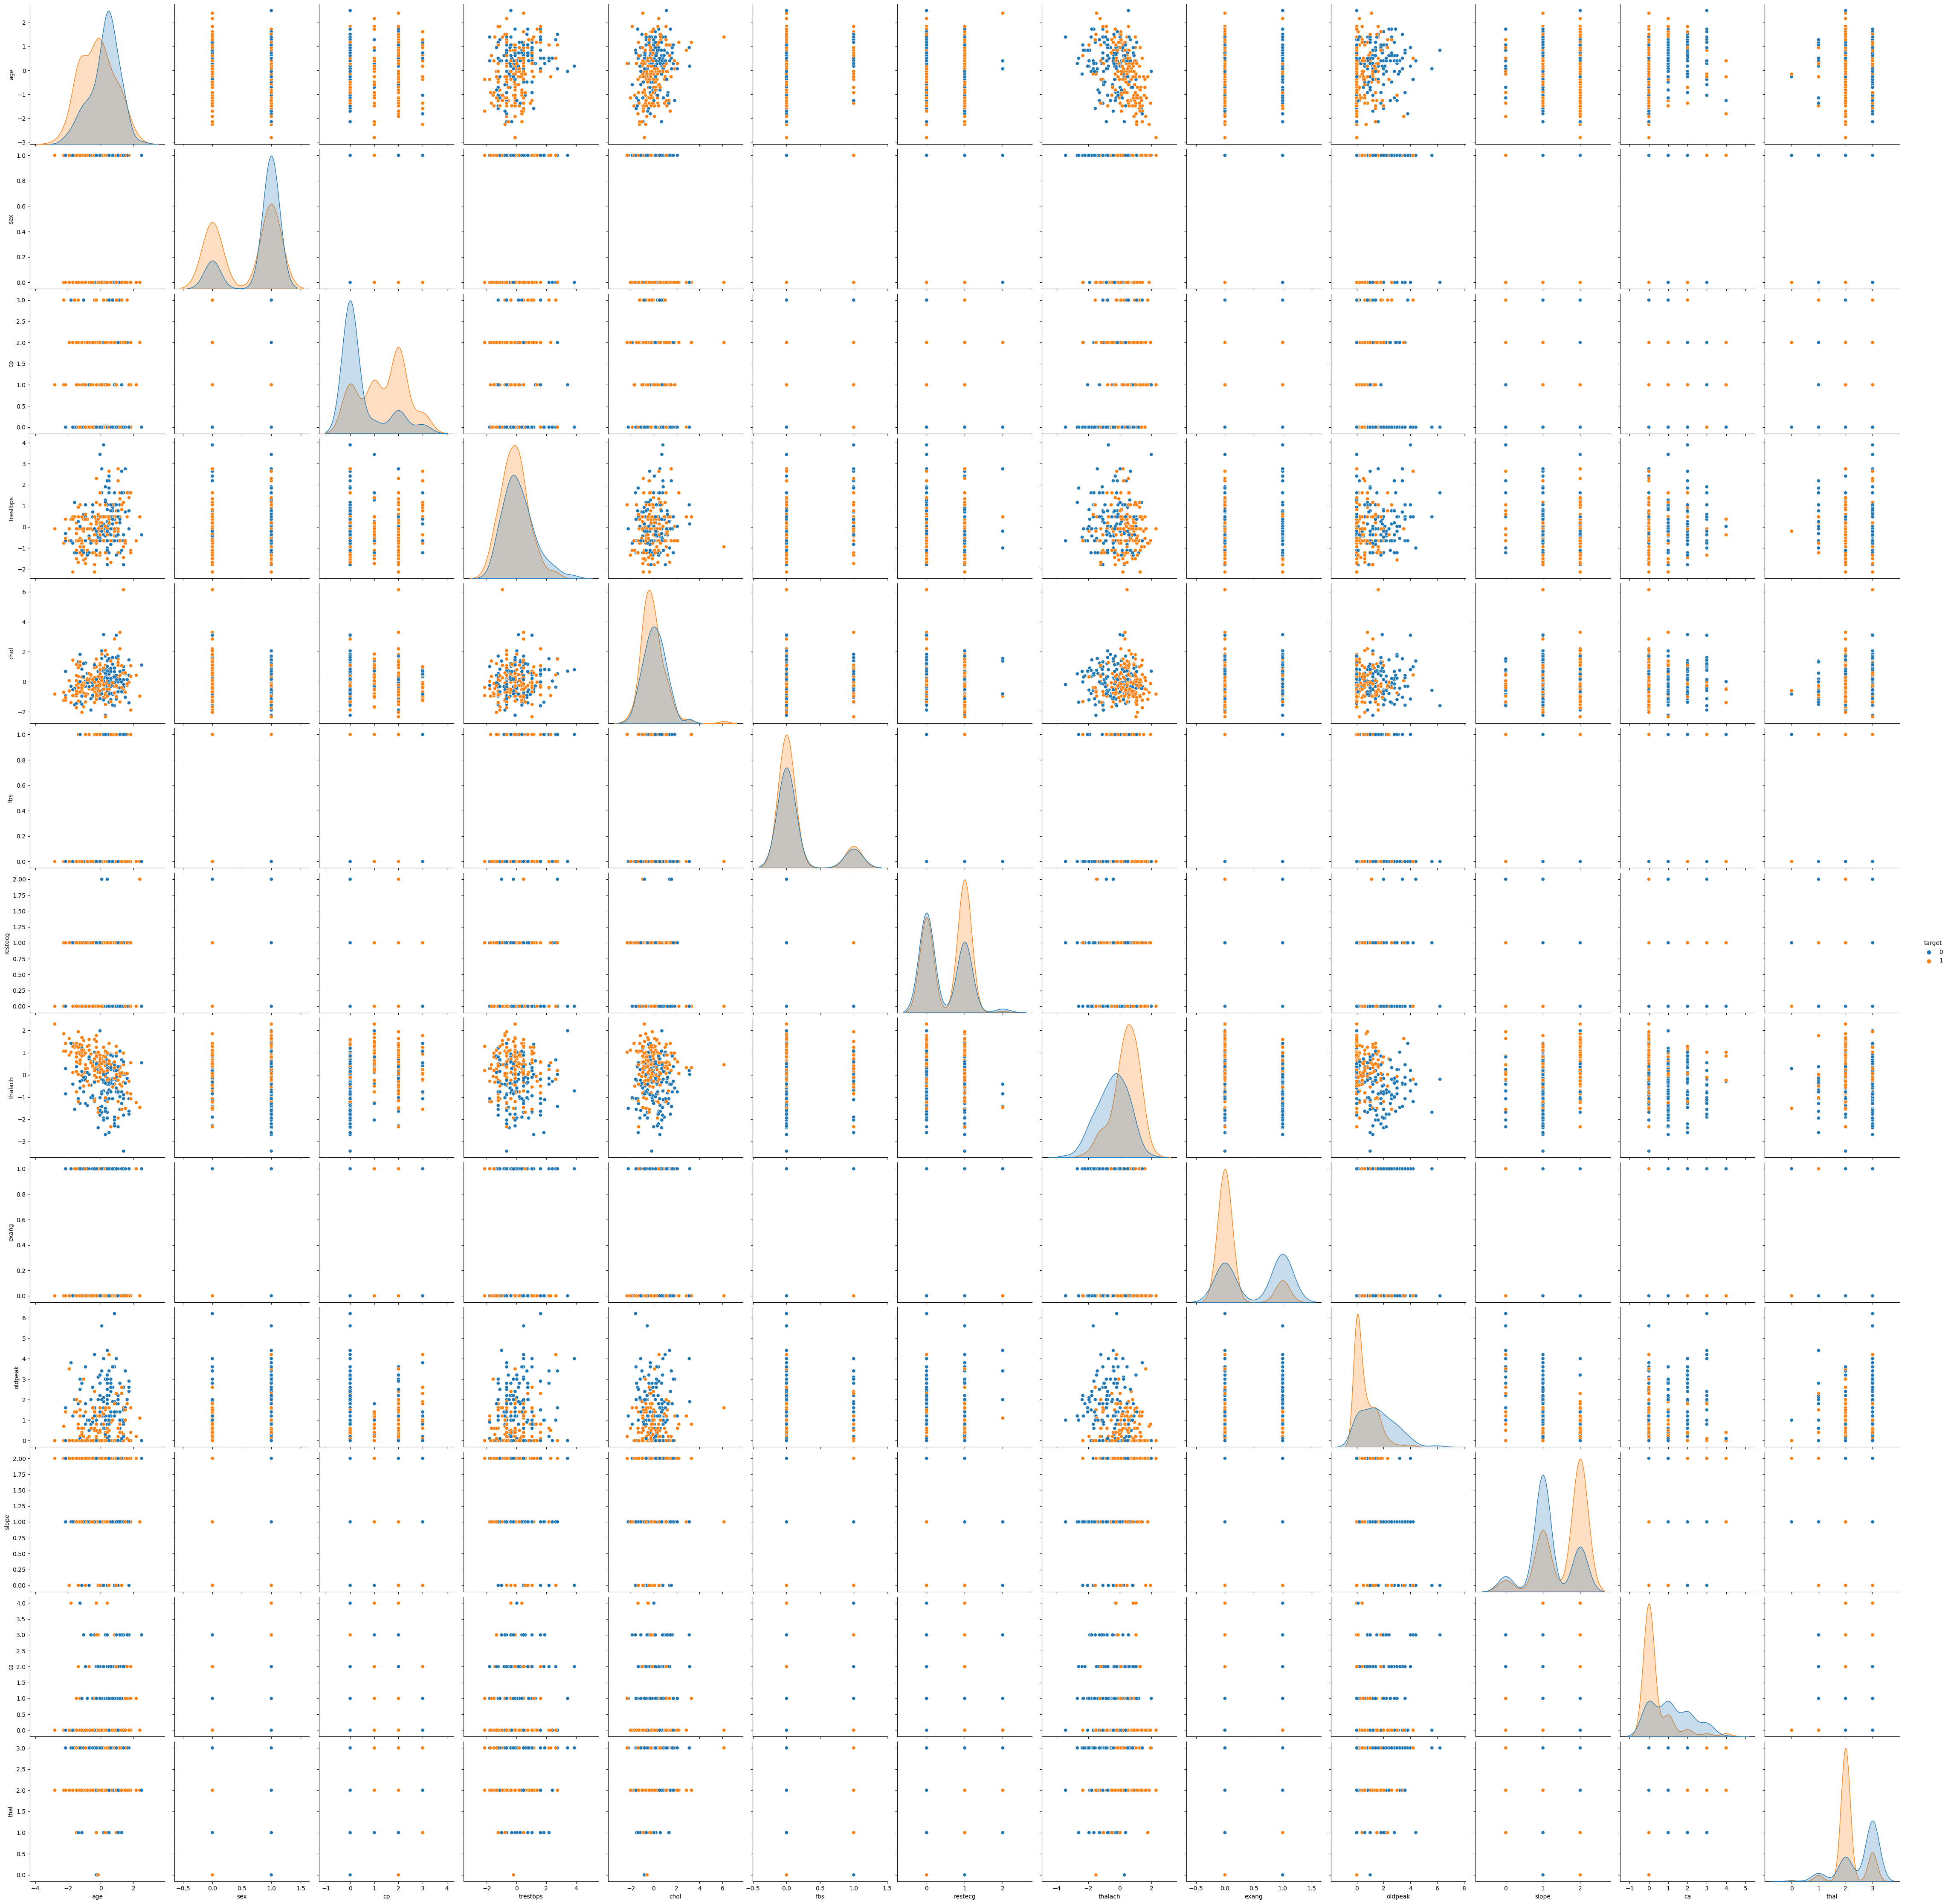

In [17]:
sns.pairplot(data, hue='target', height=3.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler # Biblioteca para padronização dos dados
X = data.iloc[:, :-1].values  # Define as colunas 0 e 4 do dataset como variáveis independentes (X) 
print(X.shape)
# Definindo a coluna 8 (Output) como preditivo 
y = data.iloc[:, -1].values # Define a coluna 13 do dataset como variável dependente (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0) # Divide os dados em conjuntos de treinamento e teste com uma proporção de 60:40.


# Define a faixa de valores de k_vizinhos
n_neighbors_values = [2, 3, 5, 7, 11, 17]

# Cria uma figura com 2 linhas e 3 colunas
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Loop sobre os valores de k_vizinhos
for i, n_neighbors in enumerate(n_neighbors_values):
    # Cria um classificador KNN com o valor atual de k_vizinhos e métrica de distância euclidiana
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean")
    classifier.fit(X_train, y_train)

    # Plota o limite de decisão
    ax = axs[i // 3, i % 3]

    # Define o número de atributos
    num_features = X_train.shape[1]


    # Define a grade de valores para os eixos X e Y
    X_set, y_set = X_train, y_train

    plot_step = 0.01
    
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), 
                         np.arange(y_min, y_max, plot_step))
    
    # Cria uma matriz de dados de teste com os valores de X e Y
    if num_features > 2:
        extra_features = np.zeros((xx.ravel().shape[0], num_features - 2))
        grid_data = np.c_[xx.ravel(), yy.ravel(), extra_features]
    else:
        grid_data = np.c_[xx.ravel(), yy.ravel()]
    
    # Classifica cada ponto de dados na grade
    Z = classifier.predict(grid_data)
    Z = Z.reshape(xx.shape)

    # Plot da fronteira de decisão
    ax.contourf(xx, yy, Z, alpha=0.75, cmap=ListedColormap(('cyan', 'gray')))
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    # X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    #                      np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    # ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    #             alpha=0.75, cmap=ListedColormap(('cyan', 'gray')))
    # ax.set_xlim(X1.min(), X1.max())
    # ax.set_ylim(X2.min(), X2.max())

    # Plot the training data points
    # Define as cores e os rótulos dos pontos de dados
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))]) # Cria uma lista de cores para cada rótulo de classe
    for j, label in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == label, 0], X_set[y_set == label, 1],
                   color=cmap(j), label=str(label))

    # Define o título e os rótulos dos eixos
    ax.set_title(f'KNN (n_neighbors = {n_neighbors})')
    ax.set_xlabel('Age')
    ax.set_ylabel('Chol')
    ax.legend()

# Ajuste o espaçamento entre os subplots
plt.tight_layout()

# Exibe os plots
plt.show()

(302, 13)


KeyboardInterrupt: 

Matriz de Confusão:
[[32 24]
 [ 6 59]]

Acurácia: 0.75
Sensibilidade (Recall): 0.91


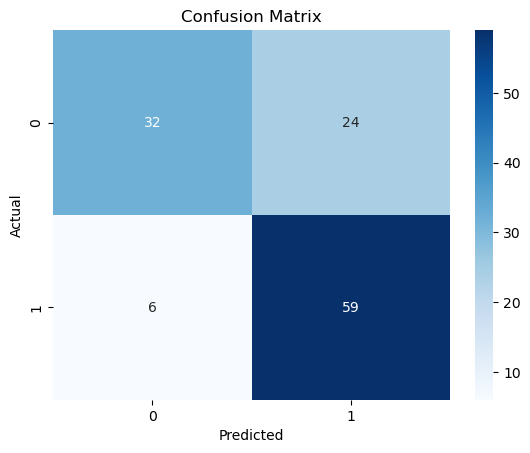

In [35]:
# Separar 60% dos dados para treinamento e 40% para teste
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Define a faixa de valores k para serem testados
n_neighbors_values = [1, 3, 5, 7, 9, 11, 19]

# Escolher a distância euclidiana
knn = KNeighborsClassifier(metric='euclidean')

# Listas para armazenar os resultados
accuracies = []
recalls = []

# Loop para encontrar o melhor valor de k
for n_neighbors in n_neighbors_values:
    knn.n_neighbors = n_neighbors

    # Treinar o modelo usando validação cruzada (5-fold)
    kfold = KFold(n_splits=5)
    accuracy_scores = cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    recall_scores = cross_val_score(knn, X_train, y_train, cv=kfold, scoring='recall')

    # Armazenar os resultados médios para acurácia e sensibilidade (recall)
    accuracies.append(accuracy_scores.mean())
    recalls.append(recall_scores.mean())

# Encontrar o melhor valor de k com base na sensibilidade (recall)
best_k = n_neighbors_values[recalls.index(max(recalls))]

# Treinar o modelo com o melhor k
knn.n_neighbors = best_k
knn.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular a matriz de confusão e as métricas
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Imprimir os resultados
print("Matriz de Confusão:")
print(cm)
print("\nAcurácia: {:.2f}".format(accuracy))
print("Sensibilidade (Recall): {:.2f}".format(recall))

# Plotar a matriz de confusão
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Matriz de Confusão (Teste) - EUCLIDIAN:
[[32 24]
 [ 6 59]]

Acurácia (Teste): 0.7521
Sensibilidade (Recall) (Teste): 0.9077
Especificidade (Teste): 0.5714


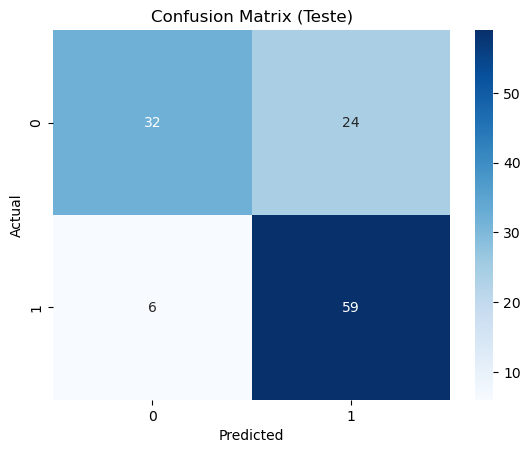

In [45]:
# Função para calcular a especificidade
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP)

# Separar 60% dos dados para treinamento e 40% para teste
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Define a faixa de valores k para serem testados
n_neighbors_values = [1, 3, 5, 7, 9, 11, 19]

# Escolher a distância euclidiana
knn = KNeighborsClassifier(metric='euclidean')

# Listas para armazenar os resultados
accuracies = []
recalls = []
specificities = []

# Loop para encontrar o melhor valor de k
for n_neighbors in n_neighbors_values:
    knn.n_neighbors = n_neighbors

    # Realizar previsões usando validação cruzada (5-fold)
    kfold = KFold(n_splits=5)
    y_pred_cv = cross_val_predict(knn, X_train, y_train, cv=kfold)

    # Calcular as métricas manualmente
    accuracy = accuracy_score(y_train, y_pred_cv)
    recall = recall_score(y_train, y_pred_cv)
    specificity = specificity_score(y_train, y_pred_cv)

    # Armazenar os resultados
    accuracies.append(accuracy)
    recalls.append(recall)
    specificities.append(specificity)

# Encontrar o melhor valor de k com base na sensibilidade (recall)
best_k = n_neighbors_values[recalls.index(max(recalls))]

# Treinar o modelo com o melhor k
knn.n_neighbors = best_k
knn.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular a matriz de confusão e as métricas para o conjunto de teste
cm = confusion_matrix(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
specificity_test = specificity_score(y_test, y_pred)

# Imprimir os resultados
print("Matriz de Confusão (Teste) - EUCLIDIAN:")
print(cm)
print("\nAcurácia (Teste): {:.4f}".format(accuracy_test))
print("Sensibilidade (Recall) (Teste): {:.4f}".format(recall_test))
print("Especificidade (Teste): {:.4f}".format(specificity_test))

# Plotar a matriz de confusão (Teste)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix (Teste)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Matriz de Confusão (Teste) - CHEBYSHEV:
[[34 22]
 [ 8 57]]

Acurácia (Teste): 0.7521
Sensibilidade (Recall) (Teste): 0.8769
Especificidade (Teste): 0.6071


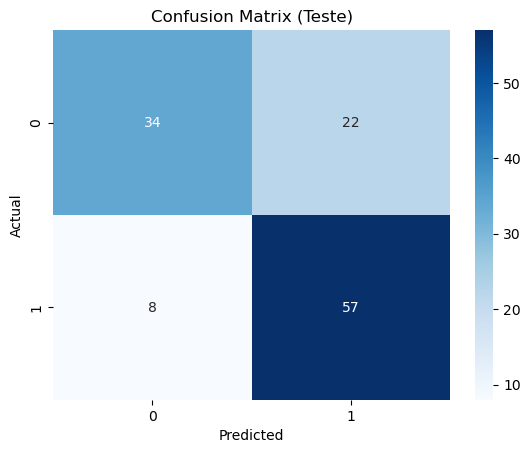

In [44]:
# Função para calcular a especificidade
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP)

# Separar 60% dos dados para treinamento e 40% para teste
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Define a faixa de valores k para serem testados
n_neighbors_values = [1, 3, 5, 7, 9, 11, 19]

# Escolher a distância euclidiana
knn = KNeighborsClassifier(metric='chebyshev')

# Listas para armazenar os resultados
accuracies = []
recalls = []
specificities = []

# Loop para encontrar o melhor valor de k
for n_neighbors in n_neighbors_values:
    knn.n_neighbors = n_neighbors

    # Realizar previsões usando validação cruzada (5-fold)
    kfold = KFold(n_splits=5)
    y_pred_cv = cross_val_predict(knn, X_train, y_train, cv=kfold)

    # Calcular as métricas manualmente
    accuracy = accuracy_score(y_train, y_pred_cv)
    recall = recall_score(y_train, y_pred_cv)
    specificity = specificity_score(y_train, y_pred_cv)

    # Armazenar os resultados
    accuracies.append(accuracy)
    recalls.append(recall)
    specificities.append(specificity)

# Encontrar o melhor valor de k com base na sensibilidade (recall)
best_k = n_neighbors_values[recalls.index(max(recalls))]

# Treinar o modelo com o melhor k
knn.n_neighbors = best_k
knn.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular a matriz de confusão e as métricas para o conjunto de teste
cm = confusion_matrix(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
specificity_test = specificity_score(y_test, y_pred)

# Imprimir os resultados
print("Matriz de Confusão (Teste) - CHEBYSHEV:")
print(cm)
print("\nAcurácia (Teste): {:.4f}".format(accuracy_test))
print("Sensibilidade (Recall) (Teste): {:.4f}".format(recall_test))
print("Especificidade (Teste): {:.4f}".format(specificity_test))

# Plotar a matriz de confusão (Teste)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix (Teste)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Matriz de Confusão (Teste) - CANBERRA:
[[38 18]
 [ 7 58]]

Acurácia (Teste): 0.7934
Sensibilidade (Recall) (Teste): 0.8923
Especificidade (Teste): 0.6786


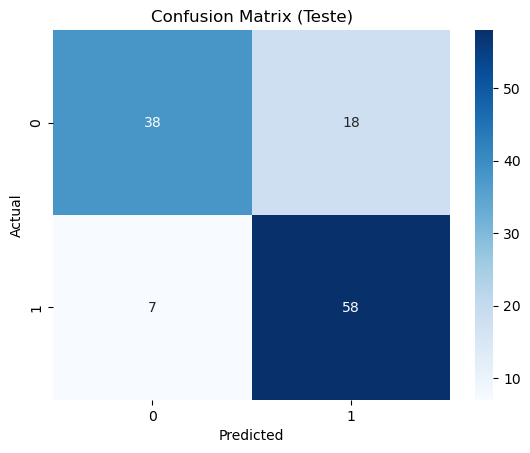

In [42]:
# Função para calcular a especificidade
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP)

# Separar 60% dos dados para treinamento e 40% para teste
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Define a faixa de valores k para serem testados
n_neighbors_values = [1, 3, 5, 7, 9, 11, 19]

# Escolher a distância euclidiana
knn = KNeighborsClassifier(metric='canberra')

# Listas para armazenar os resultados
accuracies = []
recalls = []
specificities = []

# Loop para encontrar o melhor valor de k
for n_neighbors in n_neighbors_values:
    knn.n_neighbors = n_neighbors

    # Realizar previsões usando validação cruzada (5-fold)
    kfold = KFold(n_splits=5)
    y_pred_cv = cross_val_predict(knn, X_train, y_train, cv=kfold)

    # Calcular as métricas manualmente
    accuracy = accuracy_score(y_train, y_pred_cv)
    recall = recall_score(y_train, y_pred_cv)
    specificity = specificity_score(y_train, y_pred_cv)

    # Armazenar os resultados
    accuracies.append(accuracy)
    recalls.append(recall)
    specificities.append(specificity)

# Encontrar o melhor valor de k com base na sensibilidade (recall)
best_k = n_neighbors_values[recalls.index(max(recalls))]

# Treinar o modelo com o melhor k
knn.n_neighbors = best_k
knn.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular a matriz de confusão e as métricas para o conjunto de teste
cm = confusion_matrix(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
specificity_test = specificity_score(y_test, y_pred)

# Imprimir os resultados
print("Matriz de Confusão (Teste) - CANBERRA:")
print(cm)
print("\nAcurácia (Teste): {:.4f}".format(accuracy_test))
print("Sensibilidade (Recall) (Teste): {:.4f}".format(recall_test))
print("Especificidade (Teste): {:.4f}".format(specificity_test))

# Plotar a matriz de confusão (Teste)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix (Teste)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Matriz de Confusão (Teste) - BRAYCURTIS :
[[36 20]
 [ 7 58]]

Acurácia (Teste): 0.7769
Sensibilidade (Recall) (Teste): 0.8923
Especificidade (Teste): 0.6429


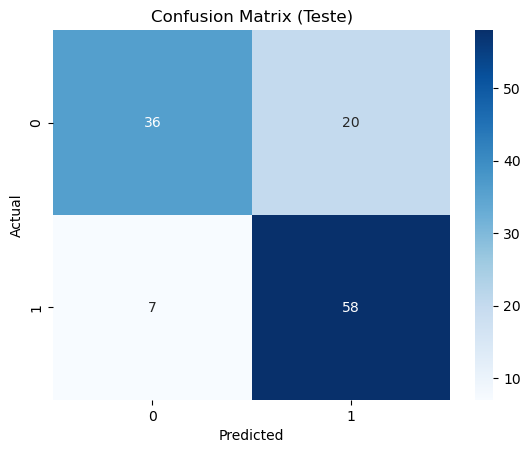

In [43]:
# Função para calcular a especificidade
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP)

# Separar 60% dos dados para treinamento e 40% para teste
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Define a faixa de valores k para serem testados
n_neighbors_values = [1, 3, 5, 7, 9, 11, 19]

# Escolher a distância euclidiana
knn = KNeighborsClassifier(metric='braycurtis')

# Listas para armazenar os resultados
accuracies = []
recalls = []
specificities = []

# Loop para encontrar o melhor valor de k
for n_neighbors in n_neighbors_values:
    knn.n_neighbors = n_neighbors

    # Realizar previsões usando validação cruzada (5-fold)
    kfold = KFold(n_splits=5)
    y_pred_cv = cross_val_predict(knn, X_train, y_train, cv=kfold)

    # Calcular as métricas manualmente
    accuracy = accuracy_score(y_train, y_pred_cv)
    recall = recall_score(y_train, y_pred_cv)
    specificity = specificity_score(y_train, y_pred_cv)

    # Armazenar os resultados
    accuracies.append(accuracy)
    recalls.append(recall)
    specificities.append(specificity)

# Encontrar o melhor valor de k com base na sensibilidade (recall)
best_k = n_neighbors_values[recalls.index(max(recalls))]

# Treinar o modelo com o melhor k
knn.n_neighbors = best_k
knn.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular a matriz de confusão e as métricas para o conjunto de teste
cm = confusion_matrix(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
specificity_test = specificity_score(y_test, y_pred)

# Imprimir os resultados
print("Matriz de Confusão (Teste) - BRAYCURTIS :")
print(cm)
print("\nAcurácia (Teste): {:.4f}".format(accuracy_test))
print("Sensibilidade (Recall) (Teste): {:.4f}".format(recall_test))
print("Especificidade (Teste): {:.4f}".format(specificity_test))

# Plotar a matriz de confusão (Teste)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix (Teste)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
